## PROYECTO: Modelación de Factores para diagnosticar Diabetes

### Equipo:

> Carolina Barba Anaya (if720071)

> Marco Antonio Ochoa Cárdenas (if720072)

### Objetivos
 
>### **Objetivo general**
>Con ayuda de una base de datos que describe el padecimiento de una enfermedad, en este caso diabetes, simular el comportamiento de variables que resultan ser detonantes para la aparición de la diabetes en las personas. Una vez realizadas dichas simulaciones, probar la correlación que existe en dichas variables para determinar los factores que resultan de mayor riesgo para que una persona pueda padecer dicha enfermedad. 

> ### **Objetivos particulares**
>Elegir de la base de datos las causas más comunes e importantes que se deben tomar en cuenta para ser diagnosticado con diabetes y realizar una simulación de estas: 

> * Nivel de glucosa
> * Índice de masa corporal
> * Cantidad de Insulina
> * Edad

### Definicion del problema:
> Dado el U.S Department of Health and Humane Services, la diabetes es una enfermedad crónica (de larga duración) que afecta la forma en que el cuerpo convierte los alimentos en energía. La mayoría de los alimentos que come se convierten en azúcar (también llamada glucosa) que se libera en el torrente sanguíneo.

> Se estima que en Estados Unidos exiten mas de 34.2 millones de personas que viven con diabetes de las cuales representan el 10.5 % de la poblacion total, a su vez este numero arrojo que en el año 2020 se dieron casi 32000 casos de defunciones a causa de estar enfermedad

> Es por ello que un estudio de las principales causas que detonan la aparición de esta enfermedad son vitales para salvar y prevenir a tiempo la deteccion de esta y en su caso al tenerla, tener las herramientas y datos correctos para atender la problemática

### Definición de hipótesis y supuestos.
>* Los eventos del dataset son independientes.
>* Se cuenta con una variable llamada "Outcome" que hace referencia al diagnostico dado por el especialista en el ramo, esta arroja si el paciente tiene o no la enfermedad 
>* Se cuentan con una base de datos amplia por lo que estas son suficientes para dar una respuesta concluyente.
>* Como los datos de nuestro dataset son independientes, es probable que cada variable vaya a tener una distribución distinta

### Nodos a simular
> * Probabilidad de ser diagnosticado con diabetes dado el nive de glucosa del paciente
> * Probabilidad de ser diagnosticado con diabetes dado el IMC (indice de masa corporal) del paciente
> * Probabilidad de ser diagnosticado con diabetes dada la cantidad de insulina en el cuerpo del paciente
> * Personas que son diagnosticadas con diabetes dada su edad

>### **Justificación** 
>* Nodo 1 :Cuando la glucosa entra en las células, la cantidad de glucosa en el torrente sanguíneo disminuye. Si tienes diabetes  el páncreas no secreta insulina, lo que provoca una acumulación de glucosa en el torrente sanguíneo. Sin la insulina, la glucosa no puede ingresar en las células.
>* Nodo 2: El índice de masa corporal es una medida útil para determinar si una persona tiene diabetes dado que es un potenciador de riesgo para detectar diabetes en la poblacion 
>* Nodo 3: La insulina es una hormona que toma glucosa de la sangre y la transporta al interior de las células del cuerpo donde se usa como energía. La diabetes ocurre cuando el páncreas no produce suficiente insulina o cuando el cuerpo no usa la insulina debidamente (llamado resistencia a la insulina).
>* Nodo 4: Existe un estudio que muestra que la diabetes aparece en la edad madura, pasados los 45 años de edad, por lo que se quiere simular si la edad es un potenciador de desarrollo de la enfermedad

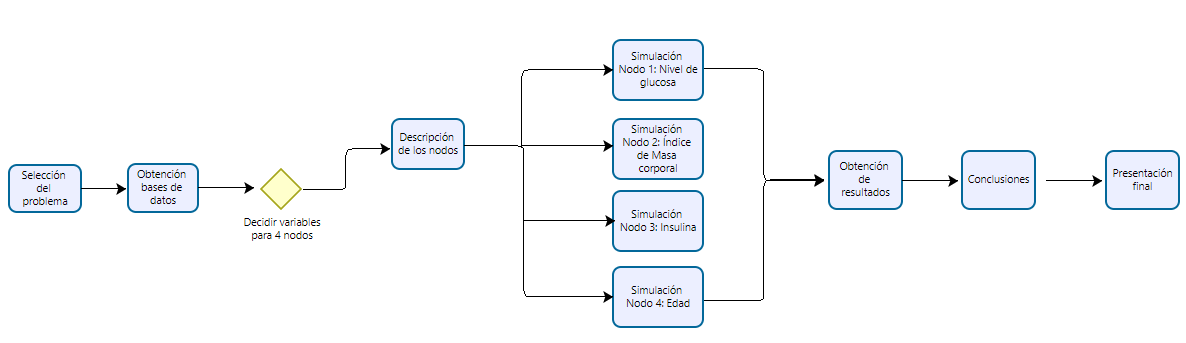

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as st 
from scipy import optimize as opt 

In [2]:
data = pd.read_csv(r'C:\Users\Caro\Documents\Carolina\Semestre 7\SPF\Proyecto_CBARBA_MAOCHOA\diabetes.csv') #imporatción de datos
#data = pd.read_csv(r"C:\Users\marco\Downloads\PROYECTO_CBARBA_MAOCHOA\diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
glucose= pd.DataFrame(data['Glucose'])# extracción de columna glucose
strokeBy_glucose = glucose.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
strokes = strokeBy_glucose['Outcome']==1#creación de filtro
strokeBy_glucose=strokeBy_glucose[strokes]#aplicación de filtro
strokeBy_glucose=strokeBy_glucose.set_index(np.arange(len(strokeBy_glucose))) # generación de nuevo indice

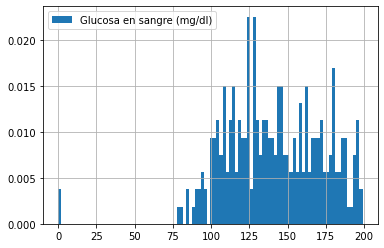

In [4]:
mu = np.mean(strokeBy_glucose['Glucose']); sigma = np.std(strokeBy_glucose)
divisiones = 100
plt.hist(strokeBy_glucose['Glucose'],divisiones,density=True,label='Glucosa en sangre (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()

Dada la gráfica obtenida, podemos ver como es que todos los datos estan distruibuidos normalmene, salvo por uno que esta lejos de la distribucion, por lo que no sera necesario dividir la nuestra en dos partes 

## Nodo 1: GLUCOSA

In [5]:
lim200=strokeBy_glucose['Glucose']>75 #selección de solo aquellos niveles de glucosa mayores a 75
strokeBy_glucose_2 = strokeBy_glucose[lim200]#selección de datos que cumplen con el filtro previamente especificado
strokeBy_glucose_2=strokeBy_glucose_2.set_index(np.arange(len(strokeBy_glucose_2))) # generación de nuevo indice

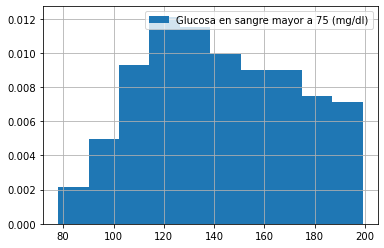

In [6]:
divisiones = 10
plt.hist(strokeBy_glucose_2['Glucose'],divisiones,density=True,label='Glucosa en sangre mayor a 75 (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()

Como se puede observar en la grafica, apararentemente se puede decir que la parte izquierda de la seccion de los datos muesra una distribucion normal en el rango de 80-140 mg/dl, a partir de 140mg/dl la distribucion deja de tener la apriancia de normatividad, por lo cual procederemos a realizar unas cuantas pruebas que nos ayuden a tener certeza de la distribucion seguida de los datos

### Distribución normal

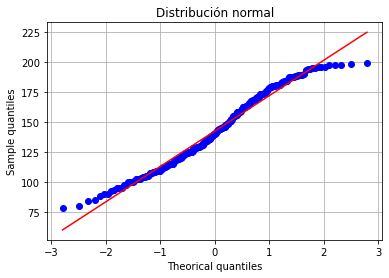

In [7]:
# Grafica de la distribucion normal

st.probplot(strokeBy_glucose_2['Glucose'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.show()


### Distribución t con pocos grados de libertad 

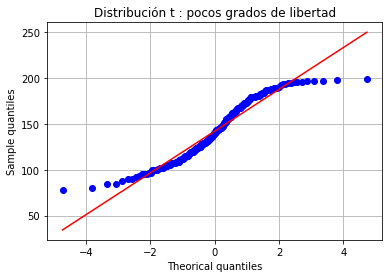

In [8]:
# Grafica de la distribucion t con pocos grados de libertad

st.probplot(strokeBy_glucose_2['Glucose'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

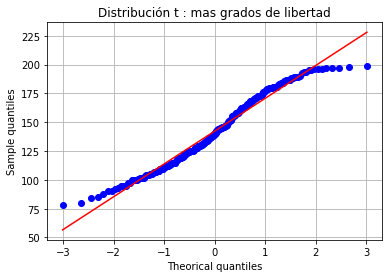

In [9]:

st.probplot(strokeBy_glucose_2['Glucose'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Prueba de Hipotesis

 Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

Valor chi cuadrado Power_divergenceResult(statistic=102.83446443265674, pvalue=0.37588258081700016)
Estadístico de prueba 120.98964369660958
Media muestral =  142.31954887218046 
Desviación estándar muestral =  29.543509289687776


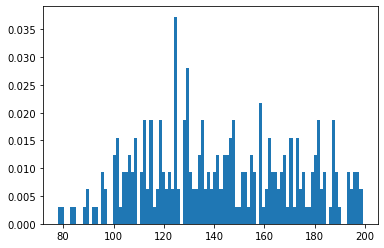

In [10]:
mu_observada = np.mean(strokeBy_glucose_2['Glucose']) ;sigma_observada=np.std(strokeBy_glucose_2['Glucose']) 
n1 = np.random.normal(mu_observada,sigma_observada,len(strokeBy_glucose_2['Glucose']))
particiones = 100
[freq,x,p]=plt.hist(strokeBy_glucose_2['Glucose'],particiones,density=True)
x=x[:-1]
mu = np.mean(x) ;sigma = np.std(x)
pi = st.norm.pdf(x,loc=mu,scale=sigma)
Ei = pi*x
chi_2=st.chisquare(freq,Ei)

p=2
m = particiones-p-1
chi_est = st.chi2.ppf(q=0.95,df=m)
print('Valor chi cuadrado',chi_2)
print('Estadístico de prueba',chi_est)
print('Media muestral = ',mu_observada,'\nDesviación estándar muestral = ',sigma_observada)

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

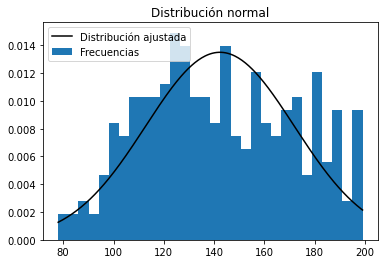

In [11]:
np.random.seed(1111)


parametros = st.norm.fit(np.asarray(strokeBy_glucose_2['Glucose']))
x = np.linspace(min(strokeBy_glucose_2['Glucose']),max(strokeBy_glucose_2['Glucose']),len(strokeBy_glucose_2['Glucose']))
pdf_fitted = st.norm.pdf(x,loc=parametros[0],scale=parametros[1])
pdf=st.norm.pdf(x)
plt.title('Distribución normal')
plt.plot(x,pdf_fitted,'k-',label='Distribución ajustada')
plt.hist(np.asarray(strokeBy_glucose_2['Glucose']),30,density=1,alpha=1 ,label='Frecuencias')
plt.legend(loc='best')
plt.show()

## Simulación Glucosa

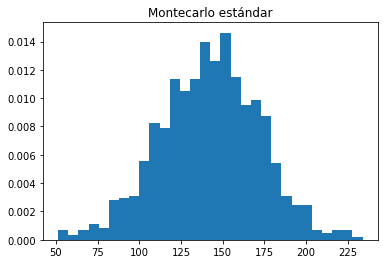

142.34938719830026

In [12]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=parametros[0], scale=parametros[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()

## NODO 2: INDICE DE MASA CORPORAL

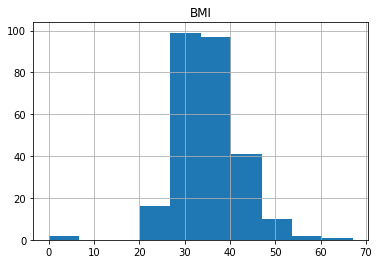

In [13]:
strokes_imc = data.loc[data['Outcome']==1]
imc = strokes_imc['BMI'].dropna()
imc= pd.DataFrame(imc)
imc=imc.set_index(np.arange(len(imc)))
imc.hist()
plt.show()

In [14]:
bmis=strokes_imc['BMI']>20 #selección de solo imc mayor a 20
strokes_imc2 = strokes_imc[bmis]#selección de datos que cumplen con el filtro previamente especificado
strokes_imc2 = strokes_imc2.set_index(np.arange(len(strokes_imc2))) # generación de nuevo indice

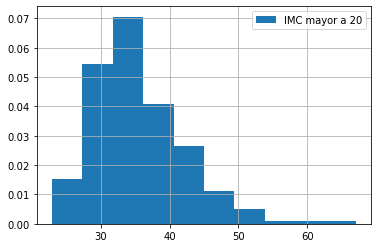

In [15]:
divisiones = 10
plt.hist(strokes_imc2['BMI'],divisiones,density=True,label='IMC mayor a 20')
plt.legend(loc='best')
plt.grid()
plt.show()

### Distribución normal

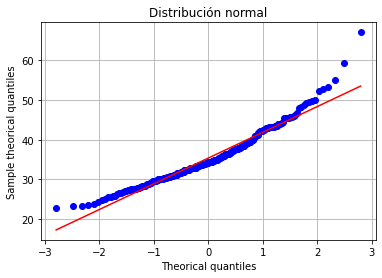

In [16]:
st.probplot(strokes_imc2['BMI'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample theorical quantiles')
plt.show()

### Distribución t con pocos grados de libertad 

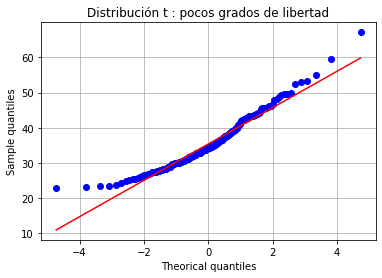

In [17]:
# Grafica de la distribucion t con pocos grados de libertad

st.probplot(strokes_imc2['BMI'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

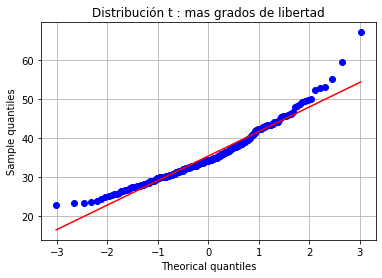

In [18]:
st.probplot(strokes_imc2['BMI'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Prueba de Hipotesis

 Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

Valor chi cuadrado Power_divergenceResult(statistic=88.54897839587038, pvalue=0.7650875883180281)
Estadístico de prueba 120.98964369660958
Media muestral =  142.31954887218046 
Desviación estándar muestral =  29.543509289687776


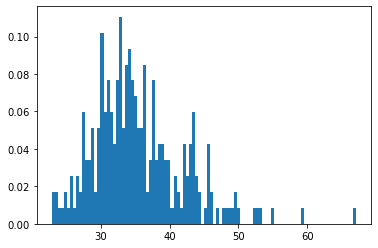

In [19]:
mu_observada_2 = np.mean(strokes_imc2['BMI']) ;sigma_observada_2=np.std(strokes_imc2['BMI']) 
n2 = np.random.normal(mu_observada_2,sigma_observada_2,len(strokes_imc2['BMI']))
particiones2 = 100
[freq,x,p]=plt.hist(strokes_imc2['BMI'],particiones2,density=True)
x=x[:-1]
mu = np.mean(x) ;sigma = np.std(x)
pi = st.norm.pdf(x,loc=mu,scale=sigma)
Ei = pi*x
chi_2=st.chisquare(freq,Ei)

p=2
m = particiones-p-1
chi_est = st.chi2.ppf(q=0.95,df=m)
print('Valor chi cuadrado',chi_2)
print('Estadístico de prueba',chi_est)
print('Media muestral = ',mu_observada,'\nDesviación estándar muestral = ',sigma_observada)

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

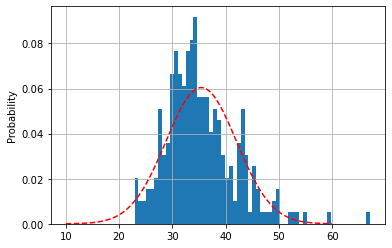

In [20]:
# Histograma de las variables creadas
p1 = st.norm.fit(strokes_imc2['BMI']) #Obtengamos los parámetros por máxima verosimilitud
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(strokes_imc2['BMI'],divisiones,density=True)
x = np.arange(10,60,.1)
y = st.norm.pdf(x,loc = p1[0], scale = p1[1])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

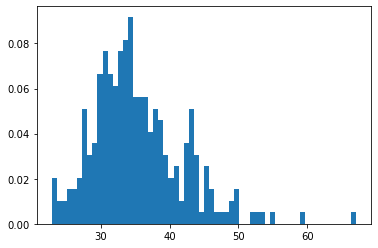

In [21]:
[freq,x,p]=plt.hist(strokes_imc2['BMI'],60,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = st.norm.pdf(x,loc=p1[0],scale=p1[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

In [22]:
# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)
print('Podemos ver que el pvalue es 0.9761, por lo que nuestro ajuste con Normal es correcto')

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=45.094003837108346, pvalue=0.9089964873955875)
Podemos ver que el pvalue es 0.9761, por lo que nuestro ajuste con Normal es correcto


### Simulación IMC

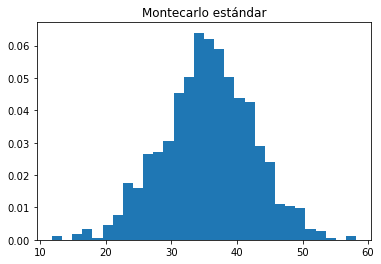

35.53022966717622

In [23]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=p1[0], scale=p1[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()